# Equation for the incompressible fluid
$$
    \begin{cases}
        \partial_t \mathbf{u} + (\mathbf{u} \cdot \nabla) \mathbf{u} - \frac{1}{Re} \nabla^2 \mathbf{u} + \nabla p = 0 \\
        \nabla \cdot \mathbf{u} = 0
    \end{cases}
$$

## Momentum equations for each component

In [45]:
import sympy as sym
import IPython.display as disp

def divergence(vector, variables):
    rows, cols = vector.shape
    assert(rows == len(variables))

    return sum([
        sym.Derivative(vector[i], variables[i]) for i in range(rows)
    ])

def laplacian(vector, variables):
    rows, cols = vector.shape
    result = sym.Matrix.zeros(rows, cols)

    for i in range(rows):
        result[i] = sum(
            sym.Derivative(vector[i], var, 2) for var in variables
        )

    return result

def convection(vector, variables):
    rows, cols = vector.shape
    result = sym.Matrix.zeros(rows, cols)

    for i in range(rows):
        for j in range(len(variables)):
            result[i,0] = result[i,0] + sym.Derivative(vector[i], variables[j]) * vector[j]

    return result

def gradient(scalar, variables):
    result = sym.Matrix.zeros(len(variables), 1)

    for i in range(len(variables)):
        result[i,0] = sym.Derivative(scalar, variables[i])

    return result


x, y, z, t, Re = sym.symbols('x y z t Re')
u, v, w, p     = sym.symbols('u v w p')

U = sym.Matrix([u,v,w])
vars = [x,y,z]

lhs = sym.Matrix([sym.Derivative(u, t), sym.Derivative(v,t), sym.Derivative(w,t)])
rhs = -convection(U, vars) + laplacian(U, vars)/Re - gradient(p, vars)

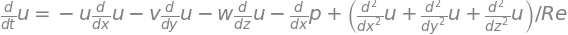

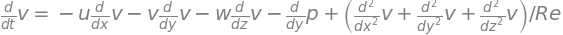

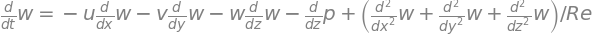

In [51]:
display(sym.Eq(lhs[0], rhs[0]))
display(sym.Eq(lhs[1], rhs[1]))
display(sym.Eq(lhs[2], rhs[2]))

## Staggered mesh challenge
The staggered mesh adds another level of complexity to the problem. For the update of the x component of the velocity we need also the y and z components, but those are defined on different grids. Some kind of interpolation is required. We propose the following stencil for the discretization of the mixed terms in the convection term

$$
    v \frac{\partial u}{\partial y} |_{i+\frac{1}{2},j,k} \approx \frac{v_{i,j+\frac{1}{2},k} + v_{i,j-\frac{1}{2},k} + v_{i+1,j+\frac{1}{2},k} + v_{i+1,j-\frac{1}{2},k}}{4} \cdot \frac{u_{i+\frac{1}{2},j+1,k} - u_{i+\frac{1}{2},j-1,k}}{2 \Delta x}
$$

As the concept of multiple grids is hard to grasp, we propose a visualization of a 2d staggered grid for velocity and pressure

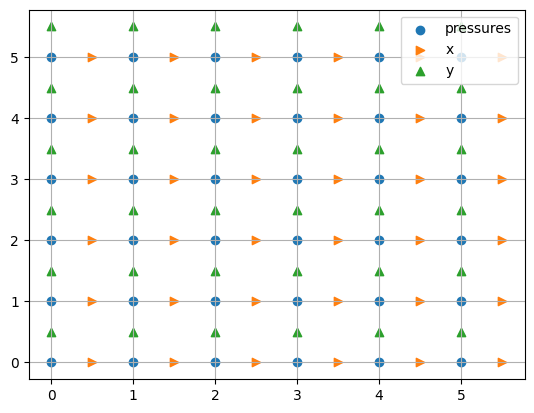

In [12]:
import numpy as np
import matplotlib.pyplot as plt

NROWS = 6
NCOLS = 6

XX, YY = np.meshgrid(
    np.linspace(0, NROWS-1, NROWS),
    np.linspace(0, NCOLS-1, NCOLS)
)

plt.scatter(XX,     YY,     marker='o', label='pressures')
plt.scatter(XX+0.5, YY,     marker='>', label='x')
plt.scatter(XX,     YY+0.5, marker='^', label='y')

plt.legend(loc='upper right')
plt.grid()
plt.show()